In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from network import *

In [47]:
from collections import Counter

In [7]:
def plot_xy_line(x, y):
    plt.plot(x, y)
    plt.show()

In [44]:
def plot_xy_dot(x, y):
    plt.plot(x, y, '.', markersize=2)
    plt.show()

In [67]:
def plot_xy_point(x, y):
    plt.plot(x, y, 'o', markersize=3, alpha=0.5)
    plt.show()

In [12]:
def plot_pairs(pairs, plot_foo):
    plot_foo([x[0] for x in pairs], [x[1] for x in pairs])

In [36]:
def plor_rank(y, plot_foo):
    plot_foo(list(range(0,len(y))), y)

In [51]:
def plot_dict(stat, plot_foo):
    plot_foo([x for x in stat.keys()], [x for x in stat.values()])


In [21]:
def plot_labels(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [22]:
coauthorNetwork = CoauthorNetwork.load_with_loader("./data/out_test.txt", parse_dataset_file);


Uniq authors: 42619


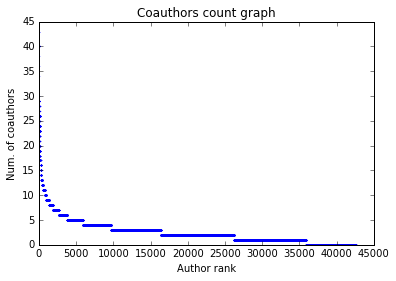

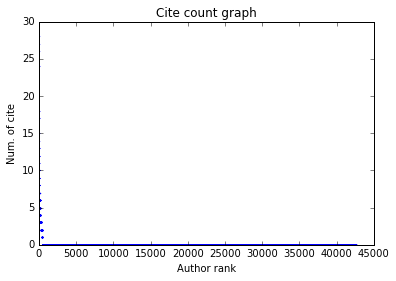

In [58]:
def neighbour_rank(graph):
    vals = sorted([len(graph.neighbors(author)) for author in graph.nodes()], reverse=True)
    plor_rank(vals, plot_xy_dot)

plot_labels("Author rank", "Num. of coauthors", "Coauthors count graph")
neighbour_rank(coauthorNetwork.gr)

plot_labels("Author rank", "Num. of cite", "Cite count graph")
neighbour_rank(coauthorNetwork.cgr)

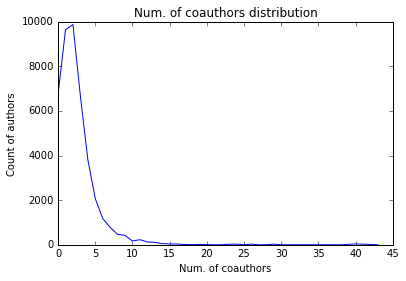

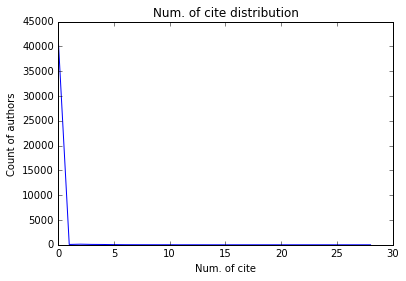

In [59]:
def neighbour_dist(graph):
    d = Counter([len(graph.neighbors(author)) for author in graph.nodes()])
    plot_dict(d, plot_xy_line)

plot_labels("Num. of coauthors", "Count of authors", "Num. of coauthors distribution")
neighbour_dist(coauthorNetwork.gr)

plot_labels("Num. of cite", "Count of authors", "Num. of cite distribution")
neighbour_dist(coauthorNetwork.cgr)


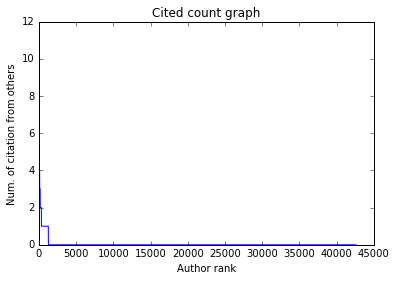

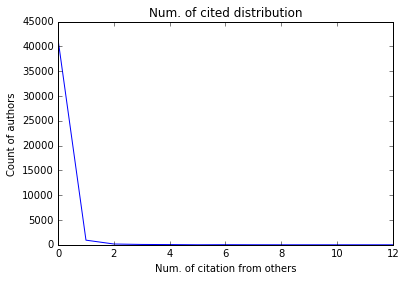

In [61]:
def in_degree_rank(graph):
    vals = sorted([graph.in_degree(author) for author in graph.nodes()], reverse=True)
    plor_rank(vals, plot_xy_line)

def in_degree_dist(graph):
    d = Counter([graph.in_degree(author) for author in graph.nodes()])
    plot_dict(d, plot_xy_line)
    

plot_labels("Author rank", "Num. of citation from others", "Cited count graph")
in_degree_rank(coauthorNetwork.cgr)

plot_labels("Num. of citation from others", "Count of authors", "Num. of cited distribution")
in_degree_dist(coauthorNetwork.cgr)


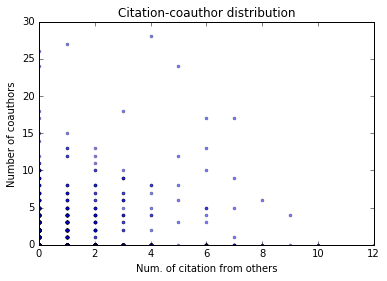

In [69]:
def coauth_cite_plot(network):
    p = [(network.cgr.in_degree(author), len(network.cgr.neighbors(author)))
     for author in network.author_to_article.keys()]
    plot_pairs(p, plot_xy_point)

plot_labels("Num. of citation from others", "Number of coauthors", "Citation-coauthor distribution")
coauth_cite_plot(coauthorNetwork)

In [ ]:
def pub_rank(network):
    r = sorted([len(x) for x in coauthorNetwork.author_to_article.values()], reverse=True)
    plor_rank(r, )